In [1]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
#\from sklearn.metrics import plot_confusion_matrix
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from pandas import set_option
import pandas as pd
import pandas
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

Using TensorFlow backend.


## Load Data

In [7]:
data=pandas.read_csv(r'C:\Users\LENOVO\Downloads\vector_facies.csv')
#training_data = shuffle(training_data)
data['Well Name'].value_counts()

CROSS H CATTLE     501
SHRIMPLIN          471
ALEXANDER D        466
NEWBY              463
LUKE G U           461
SHANKLE            449
KIMZEY A           439
NOLAN              415
CHURCHMAN BIBLE    404
Recruit F9          80
Name: Well Name, dtype: int64

In [8]:
data['Well Name'].dtypes,data['Formation'].dtypes

(dtype('O'), dtype('O'))

In [9]:
# So in order to save some memory we will change object to category datatype
#A string variable consisting of only a few different values 
#Converting such a string variable to a categorical variable will save some memory
data['Well Name'] = data['Well Name'].astype('category')
data['Formation'] = data['Formation'].astype('category')
data['Well Name'].unique()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
Facies       4149 non-null int64
Formation    4149 non-null category
Well Name    4149 non-null category
Depth        4149 non-null float64
GR           4149 non-null float64
ILD_log10    4149 non-null float64
DeltaPHI     4149 non-null float64
PHIND        4149 non-null float64
PE           3232 non-null float64
NM_M         4149 non-null int64
RELPOS       4149 non-null float64
dtypes: category(2), float64(7), int64(2)
memory usage: 301.0 KB


In [10]:
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [11]:
#checking for null values if have any drop them
data.isna().sum()

Facies         0
Formation      0
Well Name      0
Depth          0
GR             0
            ... 
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
Length: 11, dtype: int64

## Data Preprocessing

In [12]:
#dropping nuull values in 'PE' columns (All wells doesn't have  photoelectric effect)
PE_filter = data['PE'].notnull().values
data = data[PE_filter]
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [13]:
#there are 9 diff facies so assign them with different colors and labels
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_dict = {}
for i, label in enumerate(facies_labels):
    facies_color_dict[label] = facies_colors[i]
facies_color_dict

{'SS': '#F4D03F',
 'CSiS': '#F5B041',
 'FSiS': '#DC7633',
 'SiSh': '#6E2C00',
 'MS': '#1B4F72',
 'WS': '#2E86C1',
 'D': '#AED6F1',
 'PS': '#A569BD',
 'BS': '#196F3D'}

In [14]:
#adding facies_labels to thier corresponding facies  in dataframe
data.loc[:,'FaciesLabels'] = data.apply(lambda row: facies_labels[ row['Facies']-1], axis=1)
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,FSiS
...,...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,MS
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,MS
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,MS
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,MS


## Data Visualization

In [15]:
def log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

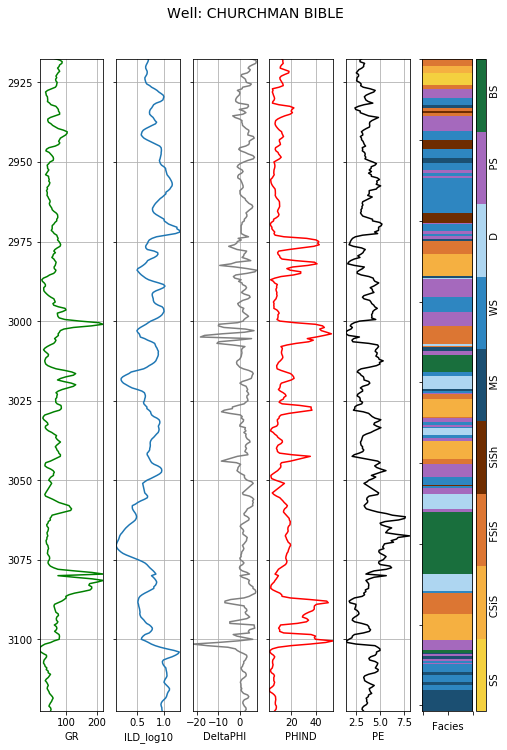

In [16]:
log_plot(data[data['Well Name'] == 'CHURCHMAN BIBLE'], facies_colors)

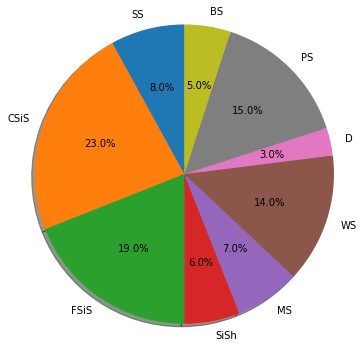

In [17]:
#Nonmarine sandstone --- 'SS'
#Nonmarine coarse siltstone --- 'CSiS'
#Nonmarine fine siltstone --- 'FSiS'
#Marine siltstone and shale --- 'SiSh'
#Mudstone (limestone) --- 'MS'
#Wackestone (limestone) --- 'WS'
#Dolomite -- 'D'
#Packstone-grainstone (limestone) --- 'PS'
#Phylloid-algal bafflestone (limestone) --- 'BS'

count=list(data['Facies'].value_counts().sort_index())
count_label=facies_labels
sizes=[]
for i in range(len(count)):
   perc= round((count[i]/sum(count))*100)
   sizes.append(perc)
    
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=count_label,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


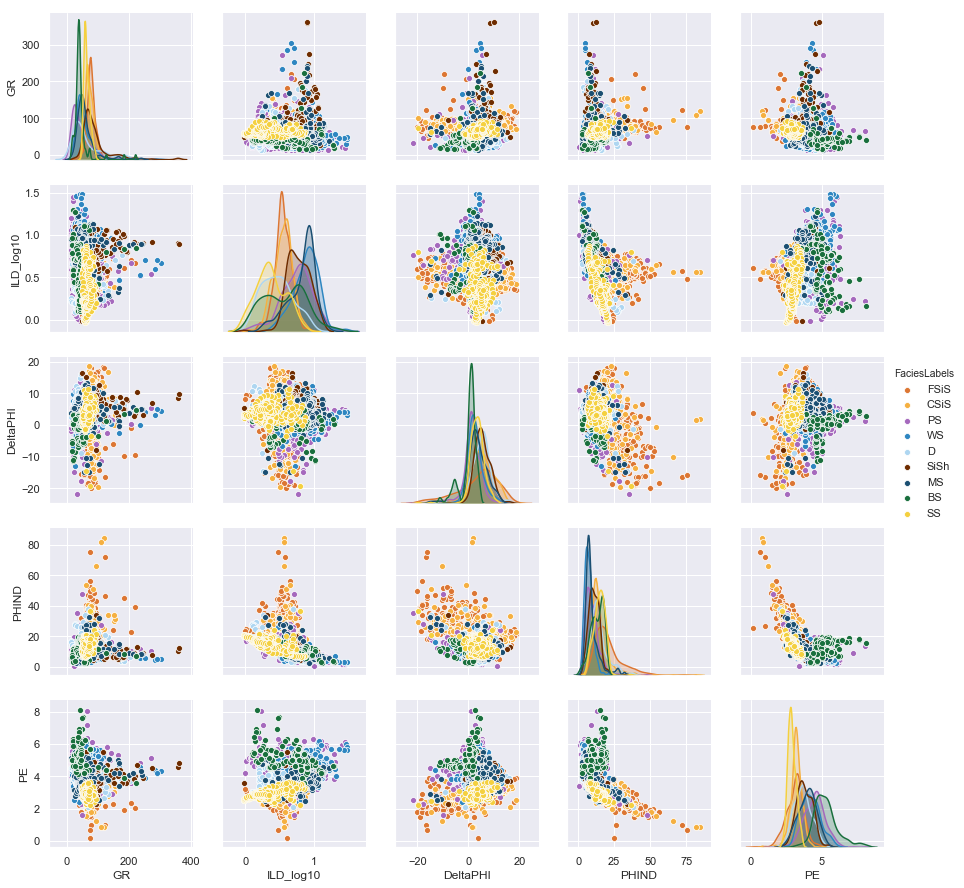

In [18]:
import seaborn as sns
sns.set()
sns.pairplot(data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_dict)

In [19]:
#shuffling data
data=shuffle(data)

In [20]:
y = data['Facies'].values
x = data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
x.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [21]:
#splitting data to train and test the DL model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [22]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler()
scaled_x_train = scaler1.fit_transform(x_train)

scaler2 = preprocessing.StandardScaler()
scaled_x_test = scaler2.fit_transform(x_test)

### Machine Learning Model

#### 1. DecesionTreeClassifier

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier(random_state=0)

In [25]:
clf.fit(scaled_x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
predictions = clf.predict(scaled_x_test)
dframe=pd.DataFrame([predictions,y_test],index=['Predicted Facies','Actual Facies']).T
dframe.tail()

,Predicted Facies,Actual Facies
965,2,2
966,3,1
967,2,3
968,1,2
969,2,2


In [27]:
from sklearn import metrics
acc=clf.score(scaled_x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
acc

Accuracy: 0.6195876288659794


0.6195876288659794

Text(0.5,12.5,'Predicted label')

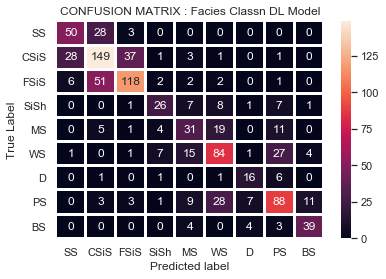

In [28]:
#confusion matrix
conf_dt = confusion_matrix(y_test,predictions)
sign=facies_labels
sns.heatmap(conf_dt, annot=True,fmt="d",linewidths=2,xticklabels=sign, yticklabels=sign)
plt.title("CONFUSION MATRIX : Facies Classn DL Model")
plt.ylabel('True Label')
plt.xlabel('Predicted label')

In [29]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

adjacent_facies = np.array([[2], [1,3], [2], [5], [4,6], [5,7,8], [6,8], [6,7,9], [7,8]],dtype=object)
#facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS','WS', 'D','PS', 'BS']

def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
        for j in adjacent_facies[i]:
            total_correct += conf[i][j-1]
    return total_correct / sum(sum(conf))


print('Facies classification accuracy = %f' % accuracy(conf_dt))
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(conf_dt, adjacent_facies))

Facies classification accuracy = 0.619588
Adjacent facies classification accuracy = 0.905155


In [31]:
#applying model to a unseen well data 
new_data=pd.read_csv(r'C:\Users\LENOVO\Downloads\well_data_with_facies.csv').drop('Unnamed: 0',axis=1)
new_data['Well Name'].value_counts()
new_data['Well Name']=new_data['Well Name'].astype('category')
features=new_data.drop(['Facies', 'Formation', 'Well Name', 'Depth'], axis=1)
labels=new_data['Facies']
new_data


,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3
1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3
2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,3
3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,3
4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3
...,...,...,...,...,...,...,...,...,...,...,...
825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3
826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3
827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3
828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3


In [32]:
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
new_predictions = clf.predict(scaled_features)
dframe_new=pd.DataFrame([new_predictions,labels],index=['Predicted Facies','Actual Facies']).T
dframe_new.head()

,Predicted Facies,Actual Facies
0,2,3
1,2,3
2,2,3
3,2,3
4,2,3


In [34]:
print("Accuracy:",metrics.accuracy_score(labels, new_predictions))

Accuracy: 0.4975903614457831


Text(0.5,32,'Predicted label')

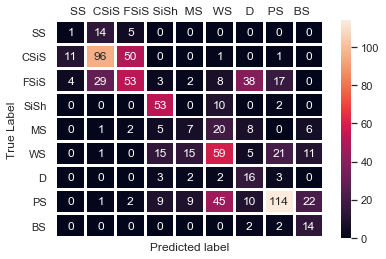

In [35]:
#confusion matrix
sign_num=['1','2','3','4','5','6','7','8','9']
new_conf_dt = confusion_matrix(labels, new_predictions)
sign=facies_labels
sns.heatmap(new_conf_dt, annot=True,fmt="d",linewidths=2,xticklabels=False, yticklabels=sign)
plt.title("SS  CSiS FSiS SiSh  MS   WS    D    PS   BS")
plt.ylabel('True Label')
plt.xlabel('Predicted label')

In [36]:
data_for_plot=new_data[new_data['Well Name']=='STUART']
data_for_plot['Prediction']=new_predictions[0:474]
data_for_plot

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Prediction
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000,3,2
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978,3,2
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956,3,2
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933,3,2
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
469,C LM,STUART,3042.5,67.683,0.701,6.0,15.20,3.603,2,0.291,4,4
470,C LM,STUART,3043.0,67.683,0.778,5.1,15.65,3.537,2,0.284,4,4
471,C LM,STUART,3043.5,67.683,0.882,4.9,15.75,3.547,2,0.276,4,4
472,C LM,STUART,3044.0,67.683,0.973,4.4,15.80,3.533,2,0.269,5,6


In [37]:
def compare(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 50, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 50, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((15*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]);ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

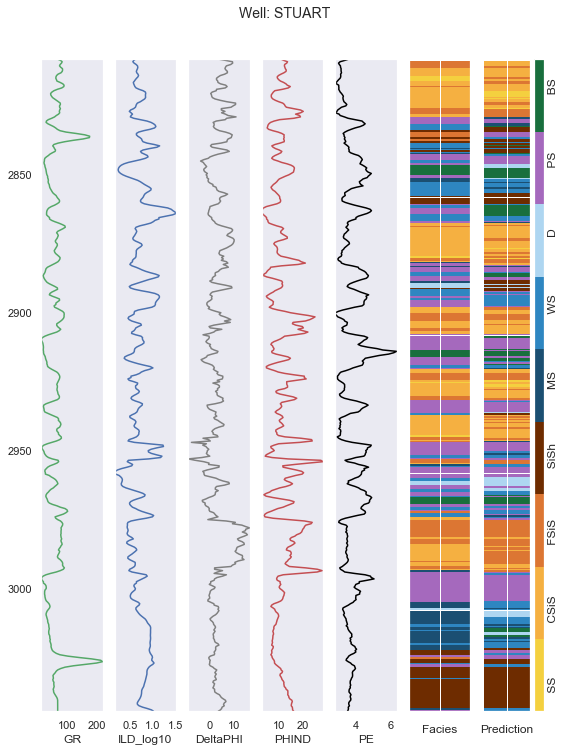

In [38]:
compare(data_for_plot, 'Prediction', facies_colors)

### 2. SVM Classifier

In [39]:
from sklearn import svm

In [40]:
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(scaled_x_train,y_train)

SVC()

In [41]:
svm_predictions = clf_svm.predict(scaled_x_test)
dframe_svm=pd.DataFrame([svm_predictions,y_test],index=['Predicted Facies','Actual Facies']).T
dframe_svm.tail()

,Predicted Facies,Actual Facies
965,2,2
966,2,1
967,3,3
968,1,2
969,3,2


In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_predictions))

Accuracy: 0.6144329896907217


In [43]:
#optimization of svm
c=[]
a=0
for j in range(1,10):
    for i in range(8,15):
        svm_clf = svm.SVC(C=i+1, gamma=j,kernel='rbf')
        svm_clf.fit(scaled_x_train,y_train)
        pred=svm_clf.score(scaled_x_test,y_test)
        svm_predictions = svm_clf.predict(scaled_x_test)
        c.append(pred*100)
        print('At c = %f'%(i+1)+'  At gamma = %f'%(j))
        print('Mean Accuracy =======================================> %f'%c[a])
        a+=1


At c = 9.000000  At gamma = 1.000000
Mean Accuracy =======================================> 75.154639
At c = 10.000000  At gamma = 1.000000
Mean Accuracy =======================================> 75.051546
At c = 11.000000  At gamma = 1.000000
Mean Accuracy =======================================> 75.154639
At c = 12.000000  At gamma = 1.000000
Mean Accuracy =======================================> 75.360825
At c = 13.000000  At gamma = 1.000000
Mean Accuracy =======================================> 75.154639
At c = 14.000000  At gamma = 1.000000
Mean Accuracy =======================================> 75.257732
At c = 15.000000  At gamma = 1.000000
Mean Accuracy =======================================> 75.154639
At c = 9.000000  At gamma = 2.000000
Mean Accuracy =======================================> 74.639175
At c = 10.000000  At gamma = 2.000000
Mean Accuracy =======================================> 74.742268
At c = 11.000000  At gamma = 2.000000
Mean Accuracy =======================

In [44]:
print('At C = %f and gamma = %f '% (9.0, 2.0))
print('Maximum Accuracy =======================================> %f'%max(c))

At C = 9.000000 and gamma = 2.000000 
Maximum Accuracy =======================================> 75.360825


In [45]:
opt_clf_svm = svm.SVC(kernel='rbf',C=9,gamma=2)
opt_clf_svm.fit(scaled_x_train,y_train)

SVC(C=9, gamma=2)

In [46]:
opt_svm_predictions = opt_clf_svm.predict(scaled_x_test)
dframe_svm=pd.DataFrame([opt_svm_predictions,y_test],index=['Predicted Facies','Actual Facies']).T
dframe_svm.tail()

,Predicted Facies,Actual Facies
965,2,2
966,1,1
967,3,3
968,1,2
969,2,2


Text(0.5,12.5,'Predicted label')

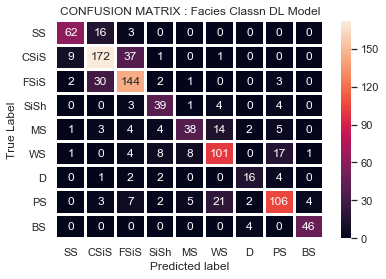

In [47]:
#confusion matrix
opt_conf_svm = confusion_matrix(y_test, opt_svm_predictions)
sign=facies_labels
sns.heatmap(opt_conf_svm, annot=True,fmt="d",linewidths=2,xticklabels=sign, yticklabels=sign)
plt.title("CONFUSION MATRIX : Facies Classn DL Model")
plt.ylabel('True Label')
plt.xlabel('Predicted label')

In [48]:
print('Facies classification accuracy = %f' % accuracy(opt_conf_svm ))
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(opt_conf_svm, adjacent_facies))

Facies classification accuracy = 0.746392
Adjacent facies classification accuracy = 0.922680


In [49]:
#applying model on unseen well data
new_predictions_svm = opt_clf_svm.predict(scaled_features)
#dframe_new_svm=pd.DataFrame([new_predictions_svm,labels],index=['Predicted Facies','Actual Facies']).T
print("Accuracy:",metrics.accuracy_score(labels, new_predictions_svm))

Accuracy: 0.6072289156626506


Text(0.5,12.5,'Predicted label')

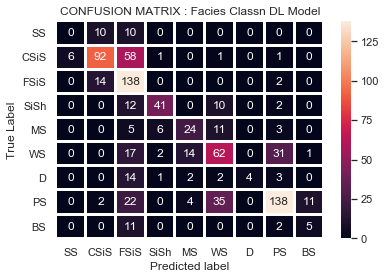

In [50]:
#confusion matrix
new_conf_svm = confusion_matrix(labels, new_predictions_svm)
sign=facies_labels
sns.heatmap(new_conf_svm, annot=True,fmt="d",linewidths=2,xticklabels=sign, yticklabels=sign)
plt.title("CONFUSION MATRIX : Facies Classn DL Model")
plt.ylabel('True Label')
plt.xlabel('Predicted label')

In [51]:
data_for_plot_svm=new_data[new_data['Well Name']=='STUART']
data_for_plot_svm['Prediction']=new_predictions_svm[0:474]
data_for_plot_svm

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Prediction
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000,3,3
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978,3,2
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956,3,2
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933,3,2
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
469,C LM,STUART,3042.5,67.683,0.701,6.0,15.20,3.603,2,0.291,4,4
470,C LM,STUART,3043.0,67.683,0.778,5.1,15.65,3.537,2,0.284,4,4
471,C LM,STUART,3043.5,67.683,0.882,4.9,15.75,3.547,2,0.276,4,3
472,C LM,STUART,3044.0,67.683,0.973,4.4,15.80,3.533,2,0.269,5,3


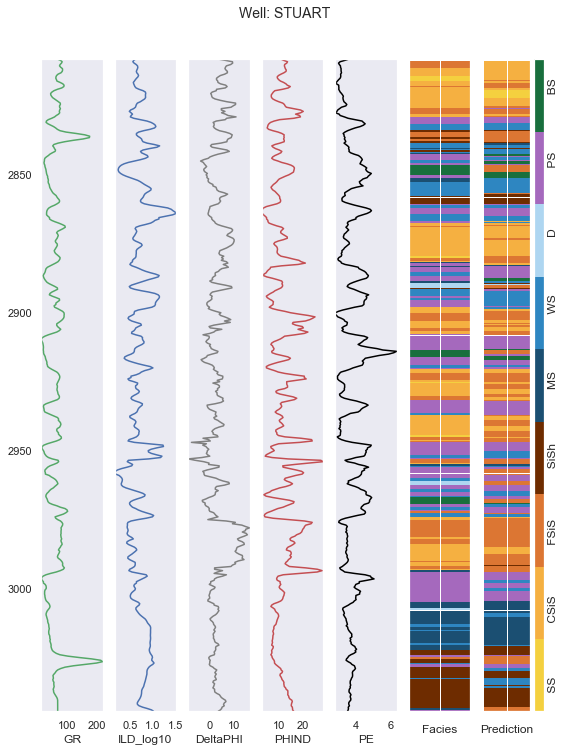

In [52]:
compare(data_for_plot_svm, 'Prediction', facies_colors)